In [1]:
import pandas as pd
import numpy as np
original_data_path = "../original_data/bank-additional-full.csv"

In [2]:
bank_data_small = pd.read_csv(original_data_path,sep=";") 

查看数据的基本情况，一共21列，最后一列为要预测的目标。

In [3]:
print(bank_data_small.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

查看数值型数据的分布情况，可以看到数值型属性中不存在缺失值，数据均值差别比较大

In [4]:
#print(bank_data_small.describe())

查看字符型属性缺失情况

In [5]:
for col in bank_data_small.columns:
    if bank_data_small[col].dtype == object:
        print("Percentage of \"unknown\" in %s：" %col ,bank_data_small[bank_data_small[col] == "unknown"][col].count(),"/",bank_data_small[col].count())

Percentage of "unknown" in job： 330 / 41188
Percentage of "unknown" in marital： 80 / 41188
Percentage of "unknown" in education： 1731 / 41188
Percentage of "unknown" in default： 8597 / 41188
Percentage of "unknown" in housing： 990 / 41188
Percentage of "unknown" in loan： 990 / 41188
Percentage of "unknown" in contact： 0 / 41188
Percentage of "unknown" in month： 0 / 41188
Percentage of "unknown" in day_of_week： 0 / 41188
Percentage of "unknown" in poutcome： 0 / 41188
Percentage of "unknown" in y： 0 / 41188


In [6]:
"""
#正类样本占总样本数的比例大概为1/9
print(bank_data_small['y'][bank_data_small['y']== 'yes'].count()/bank_data_small['y'].count())
#字符型属性各个属性值所占的比例
for col in bank_data_small.columns:
    if bank_data_small[col].dtype == object:
        print(bank_data_small.groupby(bank_data_small[col]).apply(lambda x: x['y'][x['y']== 'yes'].count()/x['y'].count()))
"""        

"\n#正类样本占总样本数的比例大概为1/9\nprint(bank_data_small['y'][bank_data_small['y']== 'yes'].count()/bank_data_small['y'].count())\n#字符型属性各个属性值所占的比例\nfor col in bank_data_small.columns:\n    if bank_data_small[col].dtype == object:\n        print(bank_data_small.groupby(bank_data_small[col]).apply(lambda x: x['y'][x['y']== 'yes'].count()/x['y'].count()))\n"

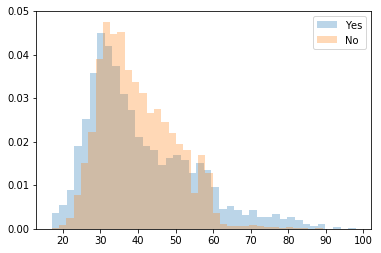

In [13]:
import matplotlib.pyplot as plt
#print(bank_data_small[bank_data_small['y']=='yes']['age'].describe())
#print(bank_data_small[bank_data_small['y']=='no']['age'].describe())
"""
plt.subplot(121)
plt.hist(bank_data_small[bank_data_small['y']=='yes']['age'],20,stacked=True)
plt.subplot(122)
plt.hist(bank_data_small[bank_data_small['y']=='no']['age'],20,stacked=True)
plt.show()
"""
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)
plt.hist(bank_data_small[bank_data_small['y']=='yes']['age'],label = "Yes", **kwargs)
plt.hist(bank_data_small[bank_data_small['y']=='no']['age'],label = "No", **kwargs)
plt.legend()
plt.show()

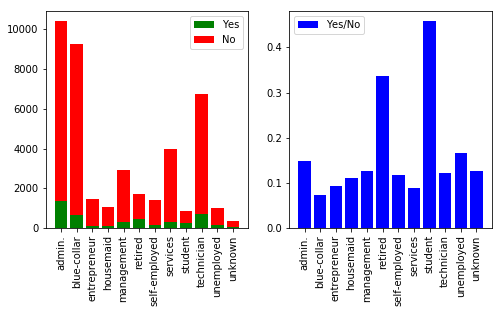

In [8]:
job = bank_data_small[bank_data_small['y']=='yes'].groupby('job').count()['y'].index
job_count_yes = bank_data_small[bank_data_small['y']=='yes'].groupby('job').count()['y']
job_count_no = bank_data_small[bank_data_small['y']=='no'].groupby('job').count()['y']
#print(job.values)
#print(job_count_yes)
#print(job_count_no)
width = 0.8
plt.figure(figsize=(8, 4)) 
plt.subplot(121)
plt.bar(job,job_count_yes, width, color='green', label='Yes')
plt.bar(job,job_count_no, width, bottom = job_count_yes, color='red', label='No')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(122)
plt.bar(job,job_count_yes/job_count_no, width, color='blue', label='Yes/No')
plt.xticks(rotation=90)
plt.legend()
plt.show()

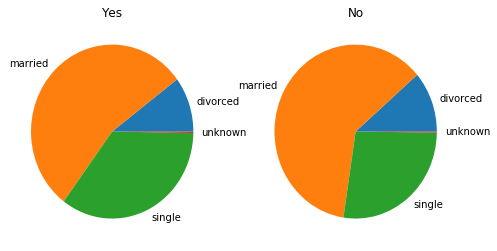

In [9]:
marital = bank_data_small[bank_data_small['y']=='yes'].groupby('marital').count()['y'].index
marital_count_yes = bank_data_small[bank_data_small['y']=='yes'].groupby('marital').count()['y']
marital_count_no = bank_data_small[bank_data_small['y']=='no'].groupby('marital').count()['y']
#print(marital.values)
#print(marital_count_yes.values)
#print(marital_count_no)
plt.figure(figsize=(8, 4)) 
plt.subplot(121)
plt.title('Yes')
plt.pie(marital_count_yes.values,labels = marital)
plt.subplot(122)
plt.title('No')
plt.pie(marital_count_no.values,labels = marital)
plt.show()

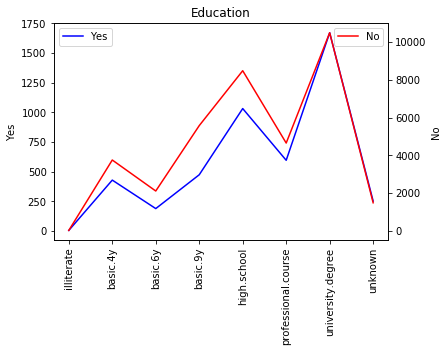

In [10]:
edu =  ["illiterate", "basic.4y", "basic.6y", "basic.9y", "high.school",  "professional.course", "university.degree","unknown"]
education_count_yes = bank_data_small[bank_data_small['y']=='yes'].groupby('education').count()['y']
education_count_no = bank_data_small[bank_data_small['y']=='no'].groupby('education').count()['y']
#按照学历对数据行重新排序
education_count_yes = education_count_yes.reindex(index=edu)
education_count_no = education_count_no.reindex(index=edu)
y = education_count_yes
n = education_count_no
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xticks(rotation=90)
ax1.plot(y.values,'b',label = "Yes")
ax1.set_xticks(np.arange(len(edu)))
ax1.set_xticklabels(edu)
ax1.set_ylabel('Yes')
ax1.set_title("Education")
plt.legend()
ax2 = ax1.twinx()  # this is the important function
ax2.plot(n.values, 'r',label = "No")
ax2.set_xticks(np.arange(len(edu)))
ax2.set_xticklabels(edu)
ax2.set_ylabel('No')
plt.legend()
plt.show()

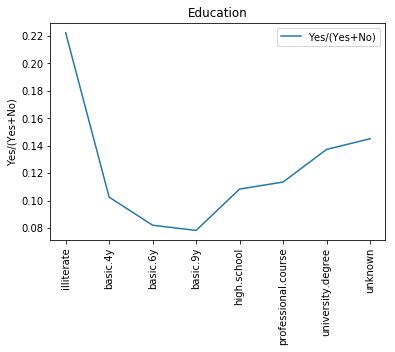

In [11]:
edu = ["illiterate", "basic.4y", "basic.6y", "basic.9y", "high.school",  "professional.course", "university.degree","unknown"]

education_count_yes = bank_data_small[bank_data_small['y']=='yes'].groupby('education').count()['y']
education_count_no = bank_data_small[bank_data_small['y']=='no'].groupby('education').count()['y']
#按照学历对数据行重新排序
education_count_yes = education_count_yes.reindex(index=edu)
education_count_no = education_count_no.reindex(index=edu)

index = education_count_yes.index
fig = plt.figure(figsize=(6, 4))
axes=fig.add_subplot(1,1,1)
axes.plot((education_count_yes/(education_count_yes+education_count_no)).values,label = 'Yes/(Yes+No)')
axes.set_xticks(np.arange(len(edu)))
axes.set_xticklabels(edu)
axes.set_title("Education")
axes.set_ylabel('Yes/(Yes+No)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

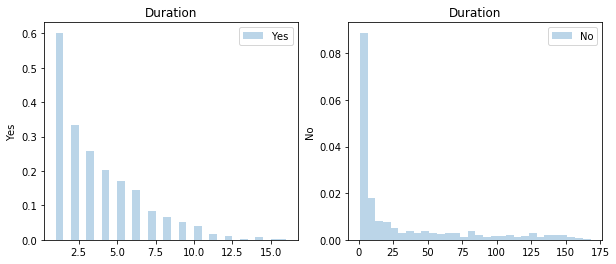

In [40]:
duration_count_yes = bank_data_small[bank_data_small['y']=='yes'].groupby('duration').count()['y']
duration_count_no = bank_data_small[bank_data_small['y']=='no'].groupby('duration').count()['y']
#print(duration_count_yes.describe())
#print(duration_count_yes.max())
#print(duration_count_no.describe())
fig = plt.figure(figsize=(10, 4))

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=30)
plt.subplot(121)
plt.title("Duration")
plt.ylabel('Yes')
plt.hist(duration_count_yes,label = "Yes", **kwargs)
plt.legend()
plt.subplot(122)
plt.title("Duration")
plt.ylabel('No')
plt.hist(duration_count_no,label = "No", **kwargs)
plt.legend()
plt.show()

